In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

from numerical_methods.euler import euler
from numerical_methods.simpson import simpson_1_3, simpson_3_8
from numerical_methods.trapezoidal import trapezoidal

# Exercício 1

Trabalho Total W = 105.84011252391159


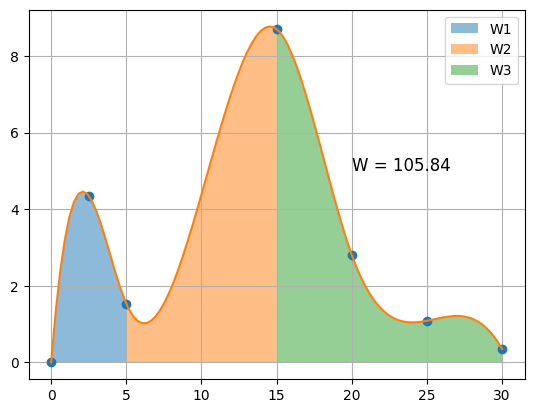

In [2]:
x = [0, 2.5, 5, 15, 20, 25, 30]
F = [0, 7, 9, 14, 10.5, 12, 5]
theta = [0.5, 0.9, 1.4, 0.9, 1.3, 1.48, 1.5]

w = F * np.cos(theta)
f = interp1d(x, w, kind="cubic")

x1 = x[0:3]
W1 = simpson_1_3(f, x1[0], x1[-1], 2)

x2 = x[2:4]
W2 = trapezoidal(f, x2[0], x2[-1], 1)

x3 = x[3:]
W3 = simpson_3_8(f, x3[0], x3[-1], 3)

W_total = W1 + W2 + W3
print("Trabalho Total W =", W_total)

# plot
plt.plot(x, w, "o")

x_plot = np.linspace(0, 30, 100)
plt.plot(x_plot, f(x_plot))

# print shaded area
w1_fill = np.linspace(x1[0], x1[-1], 100)
plt.fill_between(w1_fill, f(w1_fill), alpha=0.5, label="W1")

w2_fill = np.linspace(x2[0], x2[-1], 100)
plt.fill_between(w2_fill, f(w2_fill), alpha=0.5, label="W2")

w3_fill = np.linspace(x3[0], x3[-1], 100)
plt.fill_between(w3_fill, f(w3_fill), alpha=0.5, label="W3")

# plot W_total as text
plt.text(20, 5, f"W = {W_total:.2f}", fontsize=12)

plt.legend()
plt.grid()

# Exercício 2

In [3]:
# A)
a, b, y0 = 0, 0.5, 0
f = lambda x, y: x**2 + y**2
y_h1 = euler(f, a, b, y0, 0.1)
y_h2 = euler(f, a, b, y0, 0.05)
print("y(0,5) para A com h=0,1:", y_h1[-1])
print("y(0,5) para A com h=0,05:", y_h2[-1])


# B)
a, b, y0 = 0, 0.2, 1
f = lambda x, y: x + y
y_h1 = euler(f, a, b, y0, 0.1)
y_h2 = euler(f, a, b, y0, 0.05)
print("y(0,2) para B com h=0,1:", y_h1[-1])
print("y(0,2) para B com h=0,05:", y_h2[-1])

y(0,5) para A com h=0,1: 0.030022207380957063
y(0,5) para A com h=0,05: 0.03568261962834119
y(0,2) para B com h=0,1: 1.362
y(0,2) para B com h=0,05: 1.2310124999999998


### Análise dos Resultados:

1. Problema A

   O resultado para `h=0.05` é um pouco maior que para `h=0.1`. Como o passo
   menor geralmente proporciona uma aproximação mais precisa, podemos inferir
   que o valor de `y(0.5)` real deve estar mais próximo de 0.0357, indicando que
   a solução com `h=0.1` subestima o valor verdadeiro.

2. Problema B

   O resultado para `h=0.05` é significativamente menor que para `h=0.1`. Isso
   sugere que, ao reduzir o passo, a aproximação se torna mais precisa e o valor
   real de `y(0.2)` é mais próximo de 1.231, mostrando que a solução com `h=0.1`
   superestima o valor verdadeiro.

### Conclusão:

- No problema A, o valor de `y(0.5)` aumenta ao reduzir o passo, sugerindo que a
  solução com `h=0.05` está mais próxima do valor verdadeiro.
- No problema B, o valor de `y(0.2)` diminui ao reduzir o passo, o que indica
  que a solução com `h=0.1` estava superestimando o valor, e que o valor com
  `h=0.05` é mais preciso.

Portanto, a escolha de um passo menor melhora a precisão das soluções numéricas
em ambos os casos, conforme esperado.
